In [ ]:
# data visualization and manipulation
import matplotlib.pyplot as plt

# model selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve,roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import random as rn

import cv2
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path_daisy = "drive/MyDrive/flowers/daisy"
path_dandelion = "drive/MyDrive/flowers/dandelion"
path_rose = "drive/MyDrive/flowers/rose"
path_sunflower = "drive/MyDrive/flowers/sunflower"
path_tulip = "drive/MyDrive/flowers/tulip"

Mounted at /content/drive


In [ ]:
def assign_label(img, flower_type):
    return flower_type

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150,150))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
X = []
Z = []

make_train_data("Daisy",path_daisy)
print(len(X))

make_train_data("Dandelion",path_dandelion)
print(len(X))

make_train_data("Rose",path_rose)
print(len(X))

make_train_data("Sunflower",path_sunflower)
print(len(X))

make_train_data("Tulip",path_tulip)
print(len(X))


100%|██████████| 764/764 [00:12<00:00, 63.06it/s] 


764


100%|██████████| 1052/1052 [00:10<00:00, 101.31it/s]


1816


100%|██████████| 784/784 [00:05<00:00, 155.17it/s]


2600


100%|██████████| 733/733 [00:05<00:00, 135.14it/s]


3333


100%|██████████| 984/984 [00:07<00:00, 137.47it/s]

4317


**Visulaize Input data**

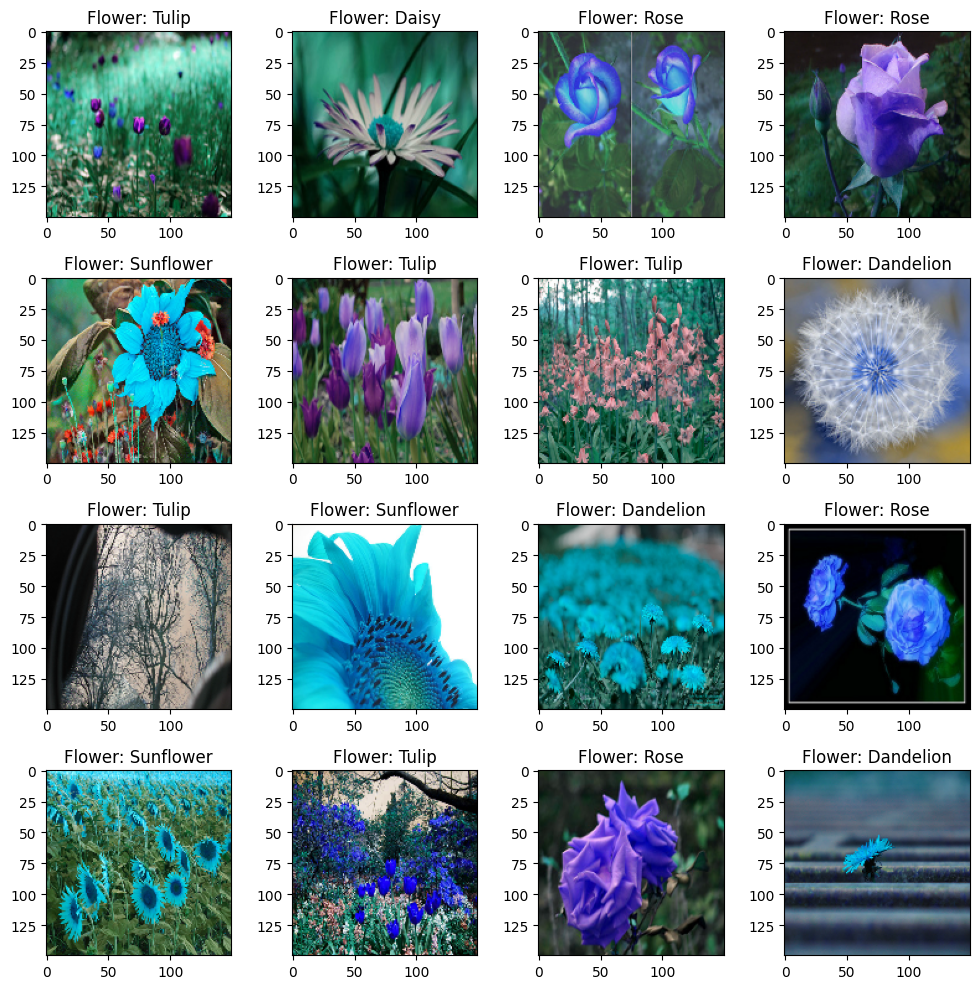

In [ ]:
f,ax = plt.subplots(4,4)
f.set_size_inches(10,10)
for i in range(4):
    for j in range(4):
        l = rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title("Flower: " + Z[l])
        
plt.tight_layout()

In [ ]:
# Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Z)
Y = to_categorical(Y,5)
X = np.array(X)
X = X/ 255

**Separate Train and Test data**

In [ ]:
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(X, Y, Z, test_size = 0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3453, 150, 150, 3)
x_test shape:  (864, 150, 150, 3)
y_train shape:  (3453, 5)
y_test shape:  (864, 5)


**Custom CNN Model**

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), padding = "Same", activation="relu", input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(5, activation="softmax"))

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0
    featurewise_std_normalization=False,   # divide inputs by std of the dataset
    samplewise_std_normalization= False,   # divide each input by its std
    zca_whitening=False,   # dimesion reduction
    rotation_range=10,    # randomly rotate images in the range 10 degrees
    zoom_range=0.1,      # Randomly zoom image 10%
    width_shift_range=0.2,   # randomly shift images horizontally 20%
    height_shift_range=0.2,   # randomly shift images vertically 20%
    horizontal_flip=True,     # randomly flip images
    vertical_flip=False    # randomly flip images
)
datagen.fit(x_train)

In [ ]:
# Epochs and Batch Size
epochs = 50
batch_size = 32

# Compiling the Keras Model 
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics = ["accuracy"])

# summary
#model.summary()

In [ ]:
from time import time
start = time()

# Fitting on the Training set and making predcitons on the Validation set
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size = batch_size), 
                              epochs= epochs, 
                              validation_data=(x_test,y_test), 
                              verbose = 1, 
                              steps_per_epoch=x_train.shape[0] // batch_size)

print("Time taken to train the Neural Net : ",time()-start)

<ipython-input-11-cb3adc43da2b>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size = batch_size),


Epoch 1/50
107/107 [==============================] - 256s 2s/step - loss: 1.3920 - accuracy: 0.3698 - val_loss: 1.2294 - val_accuracy: 0.4468
Epoch 2/50
107/107 [==============================] - 255s 2s/step - loss: 1.0957 - accuracy: 0.5554 - val_loss: 1.1935 - val_accuracy: 0.5637
Epoch 3/50
107/107 [==============================] - 259s 2s/step - loss: 0.9517 - accuracy: 0.6273 - val_loss: 0.8530 - val_accuracy: 0.7002
Epoch 4/50
107/107 [==============================] - 254s 2s/step - loss: 0.9143 - accuracy: 0.6478 - val_loss: 0.8878 - val_accuracy: 0.6644
Epoch 5/50
107/107 [==============================] - 254s 2s/step - loss: 0.8366 - accuracy: 0.6776 - val_loss: 0.8018 - val_accuracy: 0.7025
Epoch 6/50
107/107 [==============================] - 251s 2s/step - loss: 0.8227 - accuracy: 0.6858 - val_loss: 0.8196 - val_accuracy: 0.7025
Epoch 7/50
107/107 [==============================] - 257s 2s/step - loss: 0.7709 - accuracy: 0.7010 - val_loss: 0.8077 - val_accuracy: 0.6910

**Evaluating the Model Performance**

MODEL NAME <--->  <keras.engine.sequential.Sequential object at 0x7fbe14a3f310>


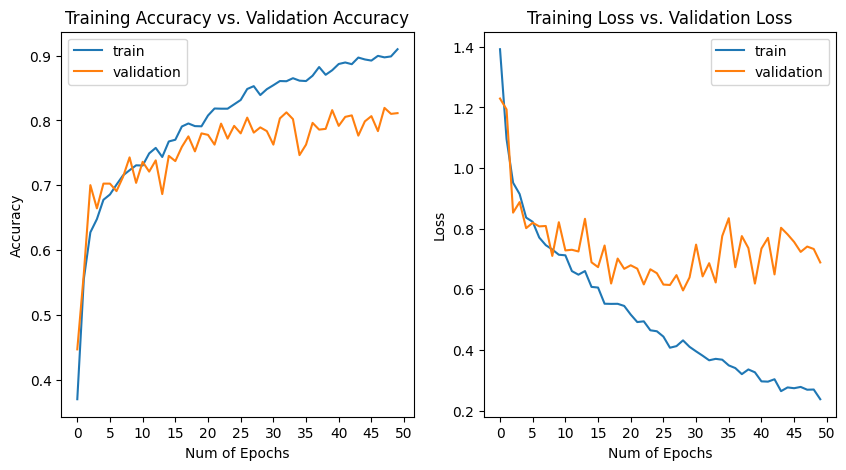

In [ ]:
print("MODEL NAME <---> ",model)
plt.figure(figsize=(10, 5))
  
# summarize history for accuracy
plt.subplot(1, 2 ,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xticks(np.arange(0, epochs+1, epochs/10))
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
  
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xticks(np.arange(0, epochs+1, epochs/10))
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
  
plt.show()

27/27 [==============================] - 16s 593ms/step
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       162
           1       0.89      0.84      0.86       223
           2       0.68      0.81      0.74       155
           3       0.83      0.90      0.86       135
           4       0.82      0.74      0.78       189

    accuracy                           0.81       864
   macro avg       0.81      0.81      0.81       864
weighted avg       0.82      0.81      0.81       864

[[129   8  18   2   5]
 [ 14 187  10   8   4]
 [  5   3 125   4  18]
 [  3   4   4 121   3]
 [  4   9  26  11 139]]


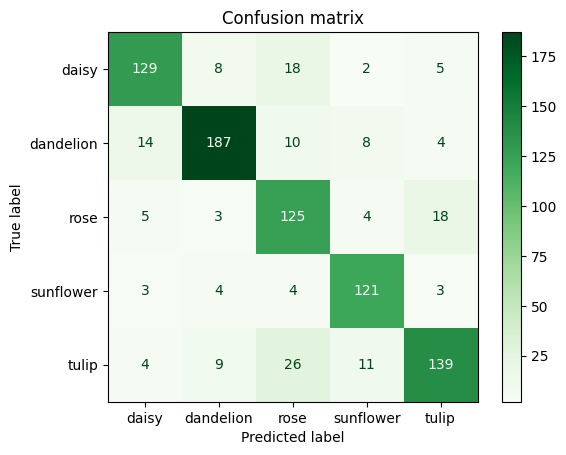

In [ ]:
from sklearn import metrics
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = -1)
predictions = predictions.reshape(1,-1)[0]

labelEncoder.fit_transform(z_test)

print(metrics.classification_report(labelEncoder.fit_transform(z_test), predictions))

print(confusion_matrix(labelEncoder.fit_transform(z_test), predictions))

ConfusionMatrixDisplay.from_predictions(labelEncoder.fit_transform(z_test), predictions, cmap=plt.cm.Greens, display_labels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])
plt.title('Confusion matrix')
plt.show()